## k-means Clustering of Movie Ratings


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper

# Import the Movies dataset
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [63]:
# Import the ratings dataset
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Now that we know the structure of our dataset, how many records do we have in each of these tables?

In [64]:
print('The dataset contains: ', len(ratings), 
      ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.


## Romance vs. Scifi

Let's start by taking a subset of the users, and seeing what their preferred genres are. We focus on the topic of clustering. 

In [65]:
# Calculate the average rating of romance and scifi movies

genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
userId,,
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


In [66]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating
0,1,3.50,2.40
1,3,3.65,3.14
2,6,2.90,2.75
3,7,2.93,3.36
4,12,2.89,2.62


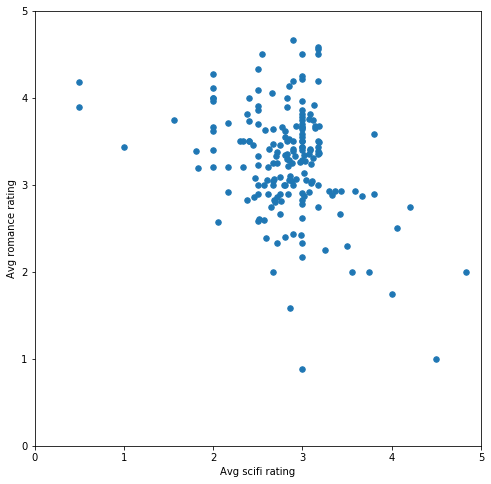

In [67]:
%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],
        'Avg scifi rating', biased_dataset['avg_romance_rating'], 
                        'Avg romance rating')


There is a clear bias in the same, created on purpose. 

In [68]:
X = biased_dataset[['avg_scifi_rating',
                    'avg_romance_rating']].values

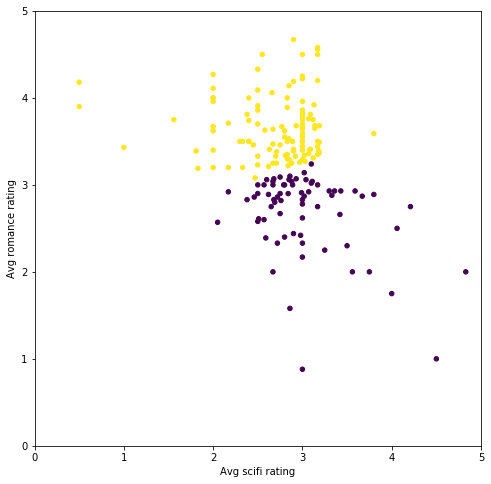

In [69]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=2)
             
predictions = clf.fit_predict(X)

helper.draw_clusters(biased_dataset, predictions)

The groups are mostly based on how each person rated romance movies.
If their average rating of romance movies is over 3 starts, then they belong to one group. 

What about three groups? 

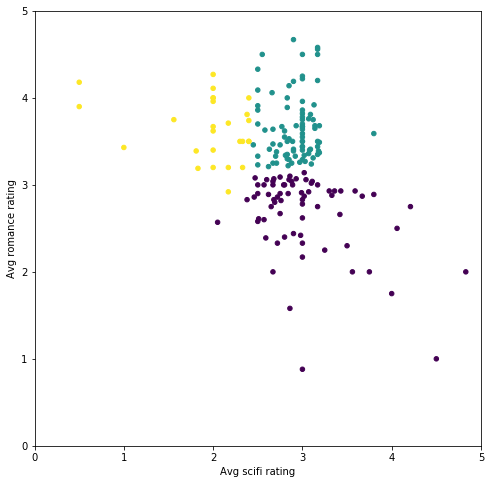

In [70]:
kmeans_three = KMeans(n_clusters=3)

three_predict = kmeans_three.fit_predict(X)

helper.draw_clusters(biased_dataset, three_predict)

Let's add one more group

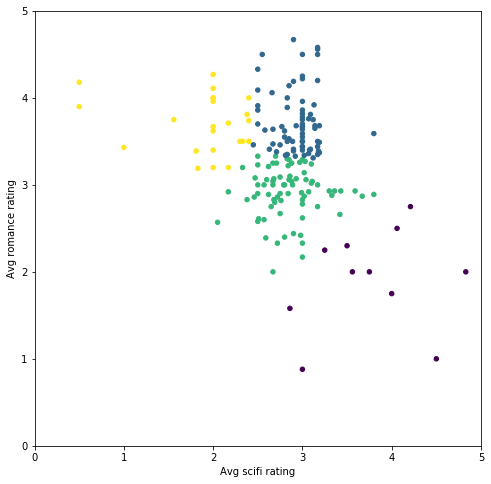

In [71]:
kmeans_four = KMeans(n_clusters=4)

four_predict = kmeans_four.fit_predict(X)

helper.draw_clusters(biased_dataset, four_predict)

## Choosing K

The elbow method works by plotting the ascending values of k versus the total error calculated using that k. 

In [72]:
# Choose the range of k values to test.
# We added a stride of 5 to improve performance. 
# We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)

# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) 
                for k in possible_k_values]

In [73]:
list(zip(possible_k_values, errors_per_k))


[(2, 0.3558817876472827),
 (7, 0.3866821323129025),
 (12, 0.3407254342999476),
 (17, 0.3735976526336408),
 (22, 0.3754853598947104),
 (27, 0.3890090901464923),
 (32, 0.38252469635312675),
 (37, 0.38506272334251124),
 (42, 0.36585103120290896),
 (47, 0.3566808598288494),
 (52, 0.3847441644856331),
 (57, 0.3607761054329245),
 (62, 0.35582937828064076),
 (67, 0.35506662223684077),
 (72, 0.35220139608938533),
 (77, 0.35303365030656614),
 (82, 0.33085102962694835),
 (87, 0.334888038638657),
 (92, 0.339101387975922),
 (97, 0.31698509904325345),
 (102, 0.31227886917071823),
 (107, 0.3061497913854913),
 (112, 0.28856022613227833),
 (117, 0.28340951813865345),
 (122, 0.27283618792422715),
 (127, 0.25008617917251125),
 (132, 0.25392839807581263),
 (137, 0.23907685705576048),
 (142, 0.21651317761442815),
 (147, 0.2067619117470992),
 (152, 0.18025399249132568),
 (157, 0.1644751402208559),
 (162, 0.15564994602870558),
 (167, 0.1282042757952911),
 (172, 0.10075966098920461),
 (177, 0.064230120163174

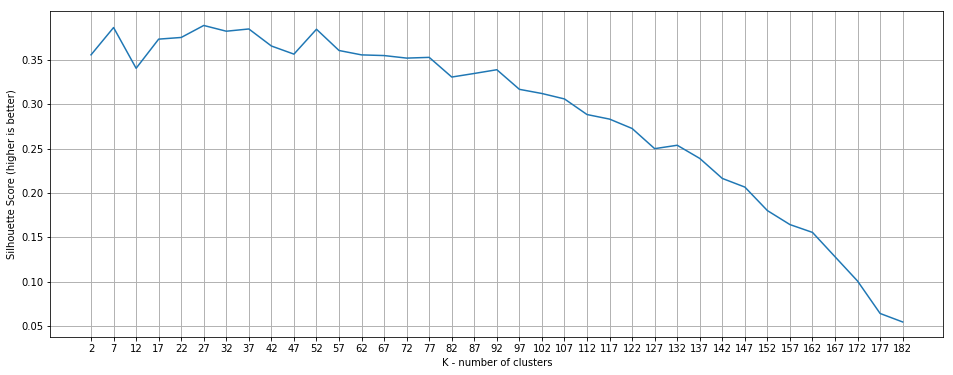

In [74]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

This shows that 7 is the best value

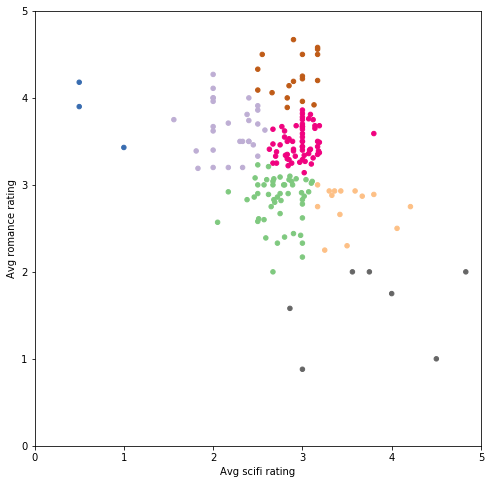

In [75]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters = 7)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent')

In [76]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  183


,userId,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [77]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values

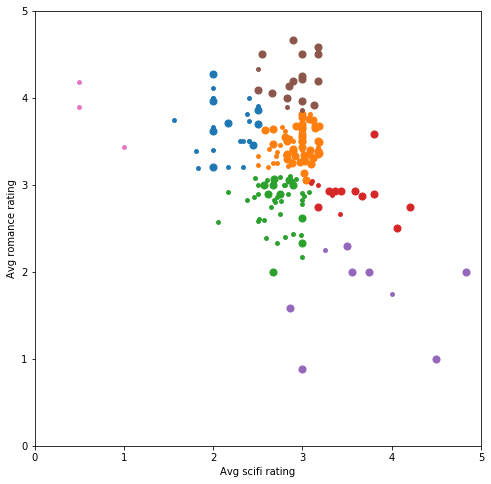

In [78]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters = 7)

# TODO: use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

In [79]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, 
        movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, 
    index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]


dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


Based on the dominance of the NaN value it is clear most users have not rated and watched most movies. This is called a sparse dataset. 

In [80]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(
    user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0


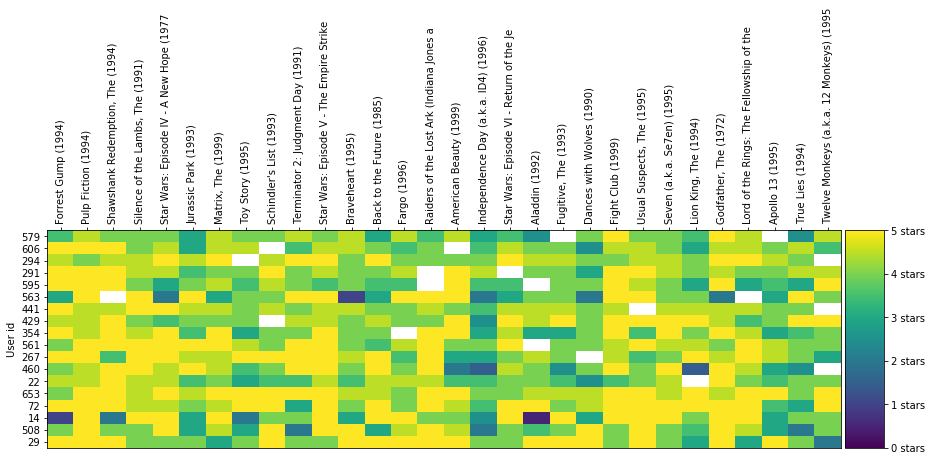

In [81]:
helper.draw_movies_heatmap(
    most_rated_movies_users_selection)

Each columns is a movie, each row is a user. 

In [82]:
user_movie_ratings =  pd.pivot_table(
    ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(
    user_movie_ratings, 1000)

In [83]:
sparse_ratings = csr_matrix(
    pd.SparseDataFrame(most_rated_movies_1k).to_coo())


In [84]:
# 20 clusters
predictions = KMeans(n_clusters=20, 
    algorithm='full').fit_predict(sparse_ratings)

To visualize some of these clusters we'll plot
them as a heat map

/Users/michaelsheinman/Machine Learning/practice_project/machine-learning/projects/k_means_Clustering/helper.py:125: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
/Users/michaelsheinman/Machine Learning/practice_project/machine-learning/projects/k_means_Clustering/helper.py:126: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
/Users/michaelsheinman/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


cluster # 19
# of users in cluster: 246. # of users in plot: 70


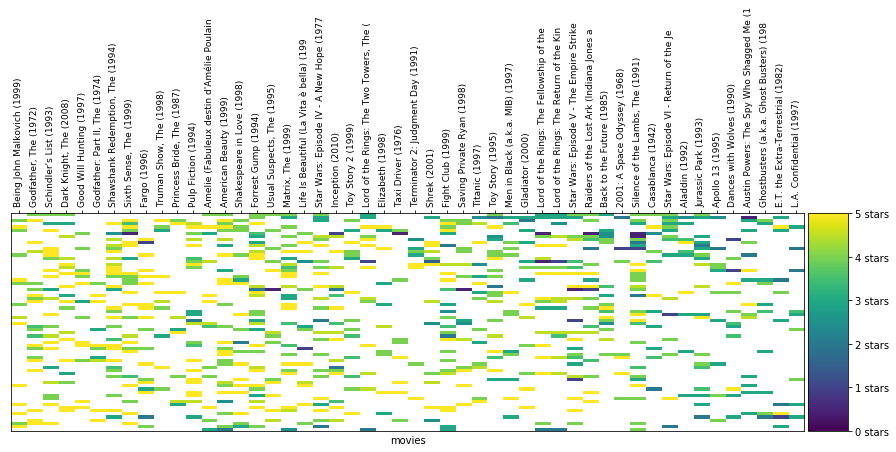

cluster # 3
# of users in cluster: 85. # of users in plot: 70


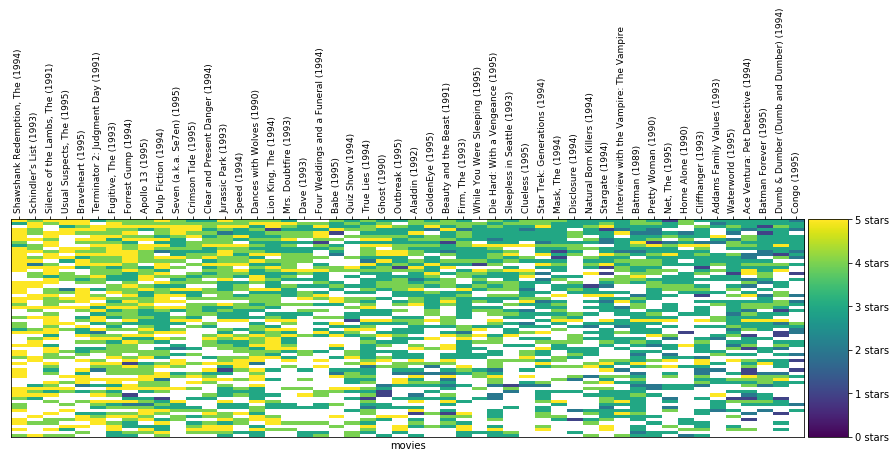

cluster # 1
# of users in cluster: 32. # of users in plot: 32


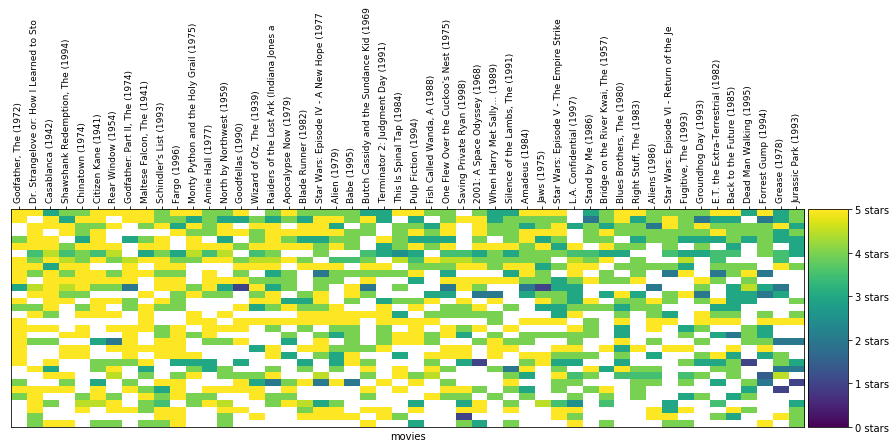

cluster # 2
# of users in cluster: 65. # of users in plot: 65


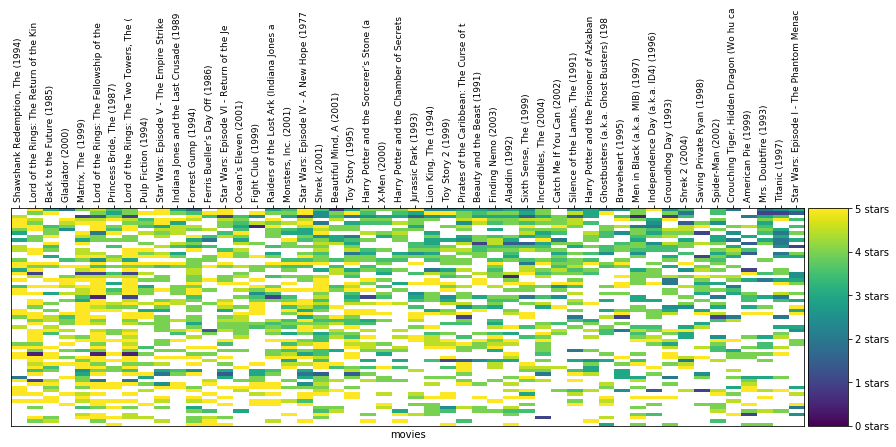

cluster # 4
# of users in cluster: 49. # of users in plot: 49


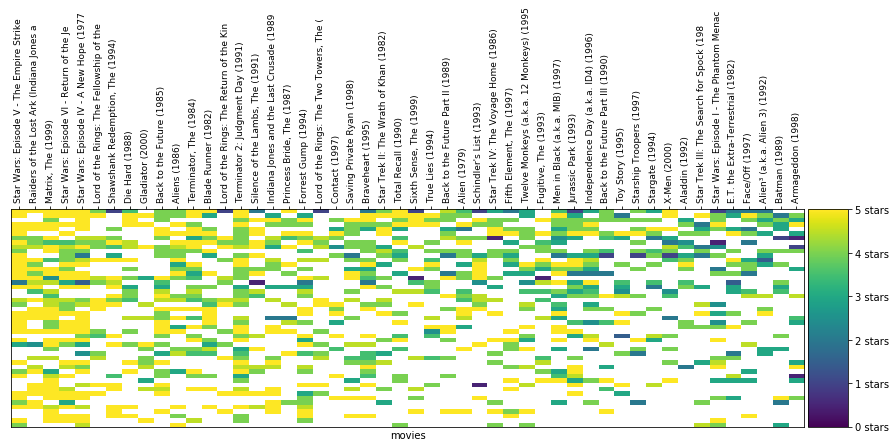

cluster # 15
# of users in cluster: 37. # of users in plot: 37


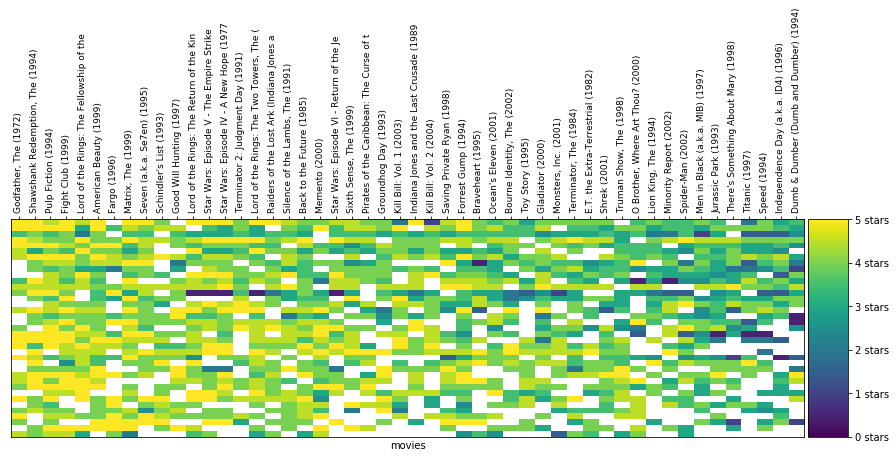

cluster # 11
# of users in cluster: 36. # of users in plot: 36


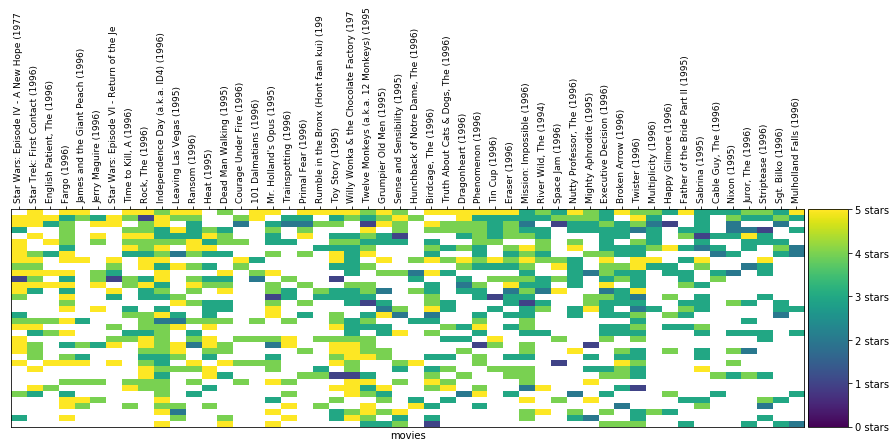

cluster # 0
# of users in cluster: 18. # of users in plot: 18


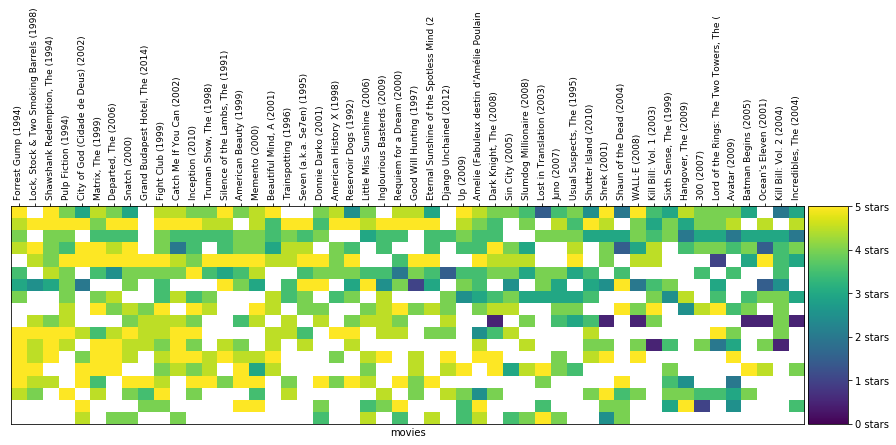

cluster # 17
# of users in cluster: 60. # of users in plot: 60


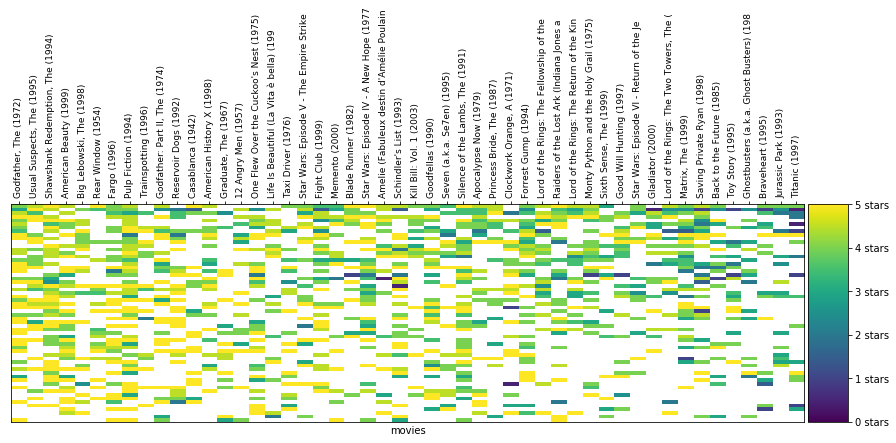

In [85]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(),
            pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, 
                max_users, max_movies)

## Prediction

Let's pick a cluster and a specific user and see 
what useful things this clustering will allow us to do.

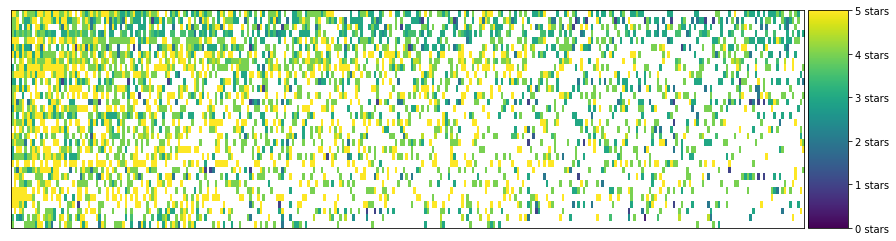

In [94]:
# TODO: Pick a cluster ID from the clusters above
cluster_number = 1

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)


In [95]:
cluster.fillna('').head()

,Star Wars: Episode V - The Empire Strikes Back (1980),Fargo (1996),Star Wars: Episode IV - A New Hope (1977),L.A. Confidential (1997),Schindler's List (1993),Back to the Future (1985),Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),One Flew Over the Cuckoo's Nest (1975),Alien (1979),Casablanca (1942),...,"Client, The (1994)","20,000 Leagues Under the Sea (1954)",Serpico (1973),Ghost (1990),Star Trek III: The Search for Spock (1984),Modern Times (1936),Shine (1996),"Doors, The (1991)","Simple Plan, A (1998)",L.A. Story (1991)
1,5,5,4,,4,5,4,4,4,3,...,3,4,,,4,,4,3,,
7,4,4,5,,4,3,3,4,5,5,...,,4,3,2,3,4,,4,,
26,4,4,5,3,,3,5,3,,5,...,3,,3,2,,,4,,,
21,4,3,4,3.5,4,3.5,4,3.5,,4.5,...,,,,3,,3.5,,3,,3
22,5,5,5,,,4,5,5,5,,...,4,3,,3,3,,4,4,,


In [97]:
movie_name = 'Fargo (1996)'

cluster[movie_name].mean()

4.5

## Recommendation 

We have used k-means to cluster users according to their ratings. Based on this, when one user did not have a rating for a certain movie we averaged the ratings of all other users. 

In [98]:
cluster.mean().head(20)


Star Wars: Episode V - The Empire Strikes Back (1980)                             4.057692
Fargo (1996)                                                                      4.500000
Star Wars: Episode IV - A New Hope (1977)                                         4.260000
L.A. Confidential (1997)                                                          4.040000
Schindler's List (1993)                                                           4.500000
Back to the Future (1985)                                                         3.687500
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    4.270833
One Flew Over the Cuckoo's Nest (1975)                                            4.173913
Alien (1979)                                                                      4.239130
Casablanca (1942)                                                                 4.586957
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)       4.636364

In [99]:

# TODO: Pick a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
user_id = 1

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

All About Eve (1950)                             4.727273
Wallace & Gromit: A Close Shave (1995)           4.700000
Christmas Story, A (1983)                        4.550000
Singin' in the Rain (1952)                       4.500000
Modern Times (1936)                              4.500000
Double Indemnity (1944)                          4.416667
Roger & Me (1989)                                4.409091
Being John Malkovich (1999)                      4.400000
Some Like It Hot (1959)                          4.375000
On the Waterfront (1954)                         4.375000
Duck Soup (1933)                                 4.375000
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    4.350000
Witness (1985)                                   4.333333
Much Ado About Nothing (1993)                    4.333333
Who Framed Roger Rabbit? (1988)                  4.300000
Wizard of Oz, The (1939)                         4.300000
Laura (1944)                                     4.300000
American Beaut